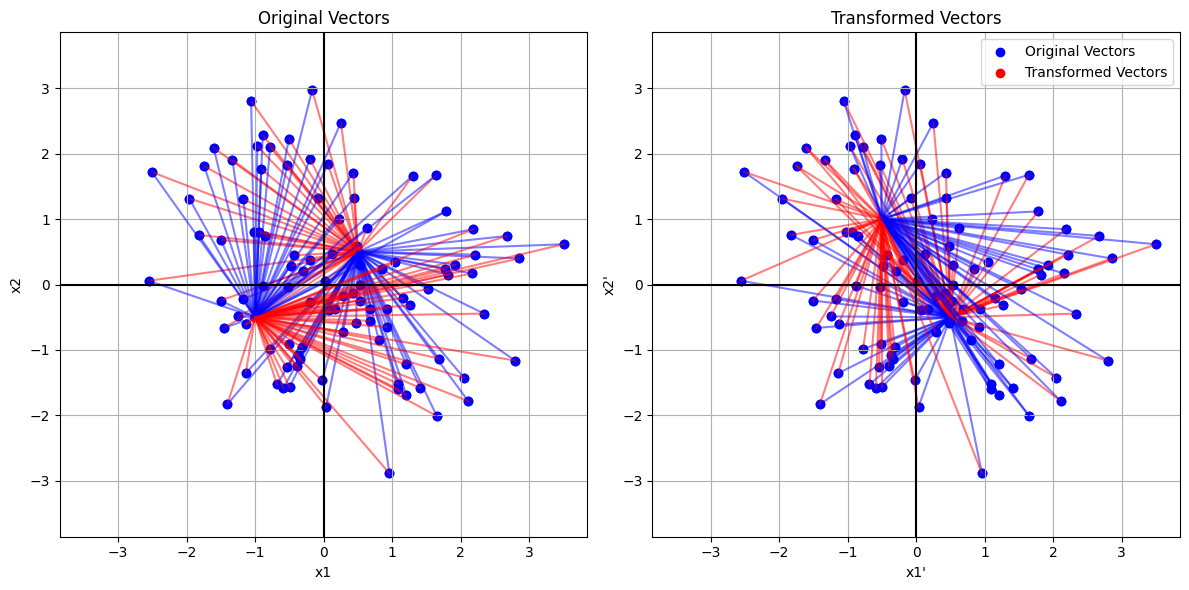

In [1]:
import torch
import matplotlib.pyplot as plt

def symplectic_bilinear_form(x, y, J):
    """Calculates the symplectic bilinear form x^T J y.

    Args:
        x: A 2D PyTorch tensor representing the first vector.
        y: A 2D PyTorch tensor representing the second vector.
        J: The symplectic matrix.

    Returns:
        The value of the bilinear form.
    """
    return torch.dot(x, J @ y)  # Corrected matrix multiplication

def normal_inner_product(x, y):
    """Calculates the normal inner product x^T y.

    Args:
        x: A 2D PyTorch tensor representing the first vector.
        y: A 2D PyTorch tensor representing the second vector.

    Returns:
        The value of the normal inner product.
    """
    return torch.dot(x, y)

def visualize_symplectic_transformation(x_vectors, y_vectors, J):
    """Visualizes the original vectors, transformed vectors, and bilinear form values.

    Args:
        x_vectors: A 2D PyTorch tensor of input vectors.
        y_vectors: A 2D PyTorch tensor of input vectors.
        J: The symplectic matrix.
    """

    # Calculate bilinear form values
    symplectic_bilinear_form_values = torch.tensor([symplectic_bilinear_form(x, y, J) for x, y in zip(x_vectors, y_vectors)])
    # normal_inner_product_values = torch.tensor([normal_inner_product(x, y) for x, y in zip(x_vectors, y_vectors)])

    transformed_y_vectors = y_vectors @ J.T
    # Set reasonable ranges for x and y axes (adjust as needed)
    max_range = max(torch.max(torch.abs(x_vectors))*1.1, torch.max(torch.abs(y_vectors))*1.1, torch.max(torch.abs(transformed_y_vectors))*1.1)
    min_range = -max_range

    # Plot original vectors
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for i in range(len(x_vectors)):
        color = 'red' if symplectic_bilinear_form_values[i] < 0 else 'blue'
        plt.plot([x_vectors[i, 0], y_vectors[i, 0]], [x_vectors[i, 1], y_vectors[i, 1]], color=color, alpha=0.5)
    plt.scatter(x_vectors[:, 0], x_vectors[:, 1], c='blue', label="Original Vectors")
    plt.scatter(y_vectors[:, 0], y_vectors[:, 1], c='red', label="Original Vectors")
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Original Vectors")
    plt.grid(True)
    plt.xlim(min_range, max_range)
    plt.ylim(min_range, max_range)

    # Plot transformed vectors
    plt.subplot(1, 2, 2)
    
    # for i in range(len(x_vectors)):
    #     plt.plot([x_vectors[i, 0], transformed_y_vectors[i, 0]], [x_vectors[i, 1], transformed_y_vectors[i, 1]], color='blue', alpha=0.5)
    # plt.scatter(x_vectors[:, 0], x_vectors[:, 1], c='blue', label="Original Vectors")
    # plt.scatter(transformed_y_vectors[:, 0], transformed_y_vectors[:, 1], c='red', label="Transformed Vectors")

    # Plot transformed vectors
    plt.subplot(1, 2, 2)
    symplectic_bilinear_form_values = torch.tensor([symplectic_bilinear_form(x, y, J) for x, y in zip(x_vectors, transformed_y_vectors)])

    for i in range(len(x_vectors)):
        color = 'red' if symplectic_bilinear_form_values[i] < 0 else 'blue'
        plt.plot([x_vectors[i, 0], transformed_y_vectors[i, 0]], [x_vectors[i, 1], transformed_y_vectors[i, 1]], color=color, alpha=0.5)
    plt.scatter(x_vectors[:, 0], x_vectors[:, 1], c='blue', label="Original Vectors")
    plt.scatter(transformed_y_vectors[:, 0], transformed_y_vectors[:, 1], c='red', label="Transformed Vectors")
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlabel("x1'")
    plt.ylabel("x2'")
    plt.title("Transformed Vectors")
    plt.grid(True)
    plt.xlim(min_range, max_range)
    plt.ylim(min_range, max_range)

    # # Plot bilinear form values
    # plt.subplot(1, 3, 3)
    # plt.plot(symplectic_bilinear_form_values, label="Symplectic Bilinear Form Values")
    # plt.plot(normal_inner_product_values, label="Normal Inner Product Values")
    # plt.xlabel("Vector Index")
    # plt.ylabel("Value")
    # plt.title("Bilinear Form and Normal Inner Product")

    plt.legend()
    plt.tight_layout()
    plt.show()

# Define the dimension of the vectors
dim = 2

# Create the symplectic matrix
J = torch.zeros(dim, dim)
for i in range(dim-1):
    if i % 2 == 0:
        J[i, i+1] = 1
        J[i+1, i] = -1

# Generate fewer random vectors
num_vectors = 100
a = []
units = [[1,0],[0,1],[-1,0],[0,-1]]
units = [[0.5,0.5], [-1,-0.5]]
for unit in units:
    a += num_vectors * [unit]

y_vectors = torch.tensor(a).float()
x_vectors = 1.3*torch.randn(num_vectors, dim).repeat(len(units), 1)

# Visualize the symplectic transformation
visualize_symplectic_transformation(x_vectors, y_vectors, J)

In [187]:
J

tensor([[ 0.,  1.],
        [-1.,  0.]])

In [209]:
x = torch.rand(2)
y = torch.rand(2)
print(torch.dot(x, y))
print(torch.dot(x, J @ y))
print(torch.dot(y, J @ x))

tensor(0.2637)
tensor(-0.3843)
tensor(0.3843)


In [220]:
print(torch.trace(J @ torch.outer(x, y)))

tensor(0.3843)


In [217]:
print(torch.trace(J @ torch.outer(y, x)))

tensor(-0.3843)


In [233]:
J @ J @ J @ J

tensor([[1., 0.],
        [0., 1.]])

In [236]:
a = J
print(a)
for i in range(5):
    a = a @ J
    print(a)

tensor([[ 0.,  1.],
        [-1.,  0.]])
tensor([[-1.,  0.],
        [ 0., -1.]])
tensor([[ 0., -1.],
        [ 1.,  0.]])
tensor([[1., 0.],
        [0., 1.]])
tensor([[ 0.,  1.],
        [-1.,  0.]])
tensor([[-1.,  0.],
        [ 0., -1.]])


In [227]:
J

tensor([[ 0.,  1.],
        [-1.,  0.]])

In [106]:
J

tensor([[ 0.,  1.],
        [-1.,  0.]])

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define an odd-symmetric MLP
class OddSymmetricMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(OddSymmetricMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False)  # No bias for odd symmetry
        self.tanh = nn.Tanh()  # Odd symmetric activation function
        self.fc2 = nn.Linear(hidden_size, output_size, bias=False)  # No bias for odd symmetry
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

# Define a simple MLP
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define RK model
class RK(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, A, train_A_type=None):
        super(RK, self).__init__()
        self.train_A_type = train_A_type
        if self.train_A_type:
            self.output_size = output_size
            self.tril_indices_list = torch.tril_indices(output_size, output_size, offset=-1).tolist()
            self.triu_indices_list = torch.triu_indices(output_size, output_size, offset=1).tolist()
            if A is not None:
                A_params_init = A[self.triu_indices_list]
                triangular_number = np.arange(output_size).sum()
                A_params_init = -2 * torch.rand(triangular_number) + 1
            else:
                A_params_init = A[self.triu_indices_list]
            self.A_params = nn.Parameter(A_params_init, requires_grad=True)
        else:
            self.A = A
        self.phi = SimpleMLP(input_size, hidden_size, output_size)
    
    def set_A(self):
        self.A = torch.zeros(self.output_size, self.output_size)
        self.A[self.tril_indices_list] = self.A_params
        if self.train_A_type == 'sym':
            self.A[self.triu_indices_list] = self.A_params
        elif self.train_A_type == 'skewsym':
            self.A[self.triu_indices_list] = -self.A_params
    
    def forward(self, x, y):
        if self.train_A_type:
            self.set_A()

        x_phi = self.phi(x)
        y_phi = self.phi(y)
        # Only return the diagonal elements (batch-wise pairwise output)
        out = torch.diagonal(x_phi @ self.A @ y_phi.T)
        return out.unsqueeze(1)  # Make sure it has the same shape as the target [batch_size, 1]

# Define RKBS model
class RKBS(RK):
    def __init__(self, input_size, hidden_size, output_size, A, train_A_type=False):
        super(RKBS, self).__init__(input_size, hidden_size, output_size, A, train_A_type)
        self.phi = SimpleMLP(input_size, hidden_size//2, output_size)
        self.psi = SimpleMLP(input_size, hidden_size//2, output_size)
    
    def forward(self, x, y):
        if self.train_A_type:
            self.set_A()

        x_phi = self.phi(x)
        y_phi = self.psi(y)
        # Only return the diagonal elements (batch-wise pairwise output)
        out = torch.diagonal(x_phi @ self.A @ y_phi.T)
        return out.unsqueeze(1)  # Ensure shape is [batch_size, 1]


# Generate asymmetric binary relation data
def generate_data(n_samples=1000, input_size=5):
    X1 = np.random.randn(n_samples, input_size)  # Random input for x
    X2 = np.random.randn(n_samples, input_size)  # Random input for y
    y = np.zeros((n_samples,))  # Binary target for relation
    
    for i in range(n_samples):
        if np.sum(X1[i]) > np.sum(X2[i]):  # Asymmetric relation condition
            y[i] = 1
    return X1, X2, y

# Training and evaluation function
def train_and_evaluate(model, X1_train, X2_train, y_train, X1_test, X2_test, y_test, num_epochs=100, lr=0.001):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X1_train, X2_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X1_test, X2_test)
            test_loss = criterion(test_outputs, y_test)
            predictions = torch.sigmoid(test_outputs) > 0.5
            accuracy = (predictions == y_test).float().mean()

        test_losses.append(test_loss.item())
        test_accuracies.append(accuracy.item())

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Test Acc: {accuracy.item():.4f}')

    return train_losses, test_losses, test_accuracies


# Plot the average and std deviation
def plot_learning_curves(train_metrics_all, test_metrics_all):
    plt.figure(figsize=(12, 6))

    # Plot training loss
    plt.subplot(1, 2, 1)
    for model_name in train_metrics_all.keys():
        train_losses_all = np.array(train_metrics_all[model_name])
        mean_train_loss = np.mean(train_losses_all, axis=0)
        std_train_loss = np.std(train_losses_all, axis=0)
        epochs = np.arange(len(mean_train_loss))
        
        plt.plot(epochs, mean_train_loss, label=f'{model_name} Train Loss')
        plt.fill_between(epochs, mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.2)

    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot test accuracy
    plt.subplot(1, 2, 2)
    for model_name in test_metrics_all.keys():
        test_accuracies_all = np.array([metrics[1] for metrics in test_metrics_all[model_name]])
        mean_test_accuracy = np.mean(test_accuracies_all, axis=0)
        std_test_accuracy = np.std(test_accuracies_all, axis=0)
        epochs = np.arange(len(mean_test_accuracy))
        
        plt.plot(epochs, mean_test_accuracy, label=f'{model_name} Test Accuracy')
        plt.fill_between(epochs, mean_test_accuracy - std_test_accuracy, mean_test_accuracy + std_test_accuracy, alpha=0.2)

    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [28]:
output_size = 4
Sigma_k = torch.rand(output_size, output_size)
Sigma_k = torch.mm(Sigma_k, Sigma_k.t())
Sigma_k.add_(torch.eye(output_size))
# Sigma_k = torch.triu(Sigma_k).T - torch.triu(Sigma_k, 1)
Sigma_k = Sigma_k.fill_diagonal_(0)
Sigma_k

tensor([[0.0000, 1.4080, 1.3767, 1.0577],
        [1.4080, 0.0000, 1.4155, 1.0398],
        [1.3767, 1.4155, 0.0000, 2.0954],
        [1.0577, 1.0398, 2.0954, 0.0000]])

In [69]:

dim = 5
x = torch.rand(dim)
y = torch.rand(dim)
b = torch.rand(1)
J = torch.zeros(dim, dim)
for i in range(dim-1):
    J[i, i+1] = 1
    J[i+1, i] = -1


w = torch.randn(x.shape[-1])  # Random weights
w_x = torch.matmul(x, w) + b
w_y = torch.matmul(y, w) + b

cos_x = torch.cos(w_x)
cos_y = torch.cos(w_y)

wwt = w.unsqueeze(1) @ w.unsqueeze(0)
outer_product = wwt * cos_x * cos_y

kernel_matrix = -torch.matmul(torch.matmul(J, outer_product), J.t())
kernel_matrix

tensor([[-0.0600,  0.0820,  0.1633,  0.0219, -0.1033],
        [ 0.0820, -0.1121, -0.2231, -0.0300,  0.1411],
        [ 0.1633, -0.2231, -0.4442, -0.0597,  0.2809],
        [ 0.0219, -0.0300, -0.0597, -0.0080,  0.0378],
        [-0.1033,  0.1411,  0.2809,  0.0378, -0.1777]])

In [81]:
kernel_matrix @ J.T

tensor([[ 0.0820,  0.2233, -0.0601, -0.2665, -0.0219],
        [-0.1121, -0.3051,  0.0821,  0.3642,  0.0300],
        [-0.2231, -0.6075,  0.1634,  0.7251,  0.0597],
        [-0.0300, -0.0816,  0.0220,  0.0974,  0.0080],
        [ 0.1411,  0.3842, -0.1033, -0.4586, -0.0378]])

In [72]:
-torch.matmul(torch.matmul(J, outer_product), J.t())

tensor([[-0.0600,  0.0820,  0.1633,  0.0219, -0.1033],
        [ 0.0820, -0.1121, -0.2231, -0.0300,  0.1411],
        [ 0.1633, -0.2231, -0.4442, -0.0597,  0.2809],
        [ 0.0219, -0.0300, -0.0597, -0.0080,  0.0378],
        [-0.1033,  0.1411,  0.2809,  0.0378, -0.1777]])

Run 1/50
Training asym_model_randA...
Epoch [10/120], Loss: 0.6384, Test Loss: 0.6850, Test Acc: 0.6037
Epoch [20/120], Loss: 0.4927, Test Loss: 0.6119, Test Acc: 0.6900
Epoch [30/120], Loss: 0.3389, Test Loss: 0.5375, Test Acc: 0.7350
Epoch [40/120], Loss: 0.1959, Test Loss: 0.4766, Test Acc: 0.7825
Epoch [50/120], Loss: 0.0877, Test Loss: 0.4488, Test Acc: 0.8100
Epoch [60/120], Loss: 0.0342, Test Loss: 0.4511, Test Acc: 0.8338
Epoch [70/120], Loss: 0.0133, Test Loss: 0.4705, Test Acc: 0.8400
Epoch [80/120], Loss: 0.0063, Test Loss: 0.4952, Test Acc: 0.8462
Epoch [90/120], Loss: 0.0038, Test Loss: 0.5154, Test Acc: 0.8487
Epoch [100/120], Loss: 0.0026, Test Loss: 0.5302, Test Acc: 0.8450
Epoch [110/120], Loss: 0.0020, Test Loss: 0.5417, Test Acc: 0.8450
Epoch [120/120], Loss: 0.0016, Test Loss: 0.5511, Test Acc: 0.8462
Training asym_model_ones...
Epoch [10/120], Loss: 0.5908, Test Loss: 0.6379, Test Acc: 0.6375
Epoch [20/120], Loss: 0.4534, Test Loss: 0.5474, Test Acc: 0.7237
Epoch [

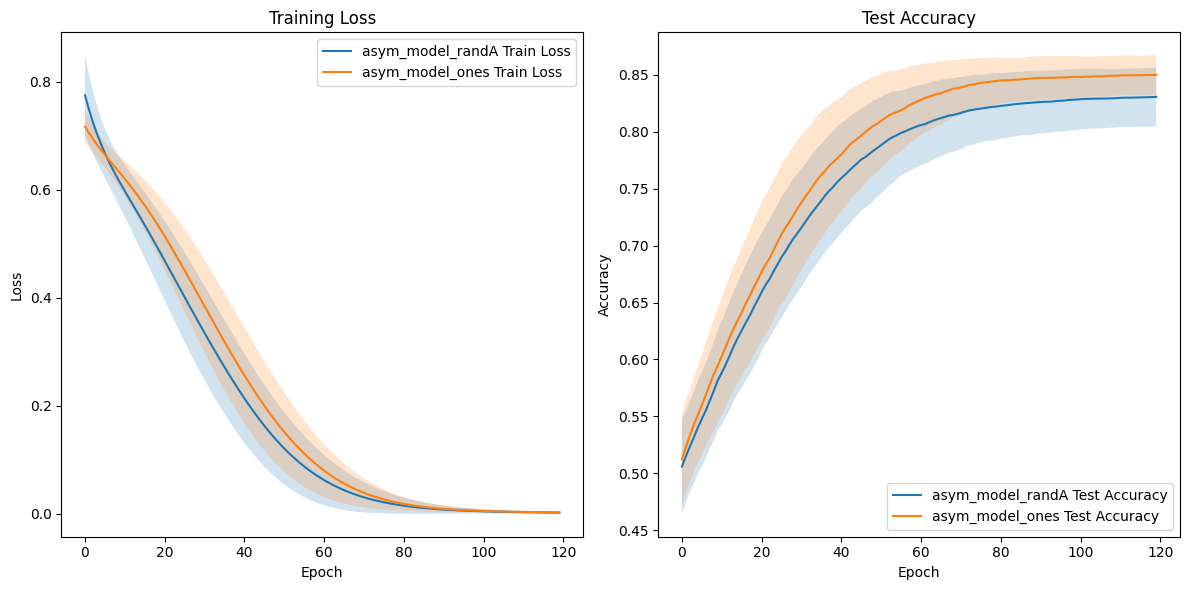

In [184]:
# Create the dataset
input_size = 32
n_samples = 1000
X1, X2, y = generate_data(n_samples, input_size)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.8)

# Convert to PyTorch tensors
X1_train = torch.tensor(X1_train, dtype=torch.float32)
X2_train = torch.tensor(X2_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X1_test = torch.tensor(X1_test, dtype=torch.float32)
X2_test = torch.tensor(X2_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Initialize models
hidden_size = 32
output_size = 8

Sigma_k = torch.rand(output_size, output_size)
Sigma_k = torch.mm(Sigma_k, Sigma_k.t())
Sigma_k.add_(torch.eye(output_size))
Sigma_k = torch.triu(Sigma_k).T - torch.triu(Sigma_k, 1)
Sigma_k = Sigma_k.fill_diagonal_(0)

I = torch.eye(output_size)

ones_oddS = torch.ones(output_size, output_size)
ones_oddS = torch.triu(ones_oddS).T - torch.triu(ones_oddS, 1)
ones_oddS = ones_oddS.fill_diagonal_(0)

unbalanced = torch.rand(output_size, output_size)
unbalanced = torch.triu(unbalanced).T - torch.triu(unbalanced, 1) 
unbalanced = unbalanced.fill_diagonal_(0)
unbalanced[[0,2], [2,0]] * 50


# models = {
#     "sym_model": (input_size, hidden_size, output_size, I),
#     "asym_model_randA": (input_size, hidden_size, output_size, Sigma_k),
#     "asym_model_ones": (input_size, hidden_size, output_size, ones_oddS),
#     "asym_model_unbal": (input_size, hidden_size, output_size, unbalanced),
#     "base_model": (input_size, hidden_size, output_size, I)
# }

models = {
    "asym_model_randA": (input_size, hidden_size, output_size, Sigma_k),
    # "asym_model_randA_train": (input_size, hidden_size, output_size, Sigma_k, "skewsys"),
    "asym_model_ones": (input_size, hidden_size, output_size, ones_oddS),
    # "asym_model_ones_train": (input_size, hidden_size, output_size, ones_oddS, "skewsys"),
    # "base_model": (input_size, hidden_size, output_size, I),
    # "base_model_train": (input_size, hidden_size, output_size, I, "sys"),
}


# Training and comparing the models
num_epochs = 120
learning_rate = 0.001

# Set the number of runs
num_runs = 50

# Store results for all runs
train_metrics_all = {model_name: [] for model_name in models.keys()}
test_metrics_all = {model_name: [] for model_name in models.keys()}

for run in range(num_runs):
    print(f'Run {run+1}/{num_runs}')
    for model_name in models.keys():
        print(f"Training {model_name}...")
        
        # Re-initialize the model for each run
        if model_name == "base_model" or model_name == "base_model_train":
            model = RKBS(*models[model_name])
        else:
            if model_name == "asym_model_randA":
                Sigma_k = torch.rand(output_size, output_size)
                Sigma_k = torch.mm(Sigma_k, Sigma_k.t())
                Sigma_k.add_(torch.eye(output_size))
                Sigma_k = torch.triu(Sigma_k).T - torch.triu(Sigma_k, 1)
                Sigma_k = Sigma_k.fill_diagonal_(0)
                model = RK(*models[model_name][:-1], Sigma_k)
            elif model_name == "asym_model_ones":
                model = RK(*models[model_name])
            else:
                raise Exception("temp block")
        
        # Train and evaluate the model
        train_losses, test_losses, test_accuracies = train_and_evaluate(
            model, X1_train, X2_train, y_train, X1_test, X2_test, y_test, num_epochs, learning_rate
        )

        # Collect metrics for all runs
        train_metrics_all[model_name].append(train_losses)
        test_metrics_all[model_name].append((test_losses, test_accuracies))


# Plot results
plot_learning_curves(train_metrics_all, test_metrics_all)


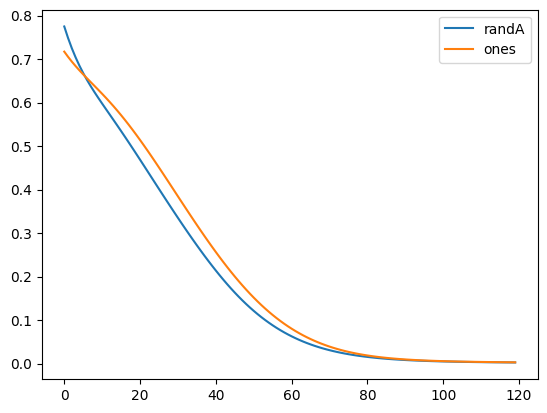

In [185]:
plt.plot(np.array(train_metrics_all['asym_model_randA']).mean(0), label="randA")
plt.plot(np.array(train_metrics_all['asym_model_ones']).mean(0), label="ones")
plt.legend()
plt.show()